# Question 4

In [ ]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
import random
from google.colab.patches import cv2_imshow
from scipy.signal import convolve2d

## part a

In [ ]:
# Do not change this cell
image = cv2.imread('cat.png',cv2.IMREAD_GRAYSCALE)

In [ ]:
def Add_Noise(img):
    """
    Add salt and pepper noise to the input image.
        Parameters:
          image: Input image (numpy array).
        Returns:
          Image with salt and pepper noise added.
    """

    total_noise = np.random.randint(0, int(img.size * 0.05))

    for _ in range(total_noise):
        x_cor = np.random.randint(0, img.shape[0])
        y_cor = np.random.randint(0, img.shape[1])
        img[x_cor, y_cor] = np.random.choice([0, 255])

    return img

(-0.5, 374.5, 499.5, -0.5)

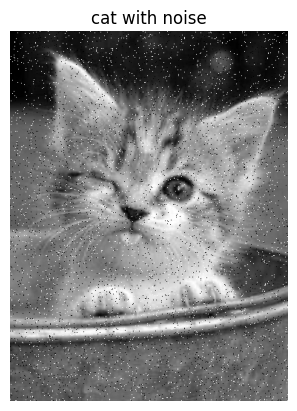

In [ ]:
img = Add_Noise(image)
plt.imshow(img,cmap='gray')
plt.title("cat with noise")
plt.axis("off")

# part b

<h3> in this section we want to implement : </h3>

1.   Averaging Blurring
2.   Median Blurring
3.   Gaussian Blurring

<h3> you should define reflect101 padding function and use it befor blurring </h3>
<h3><b> note : you can't use libraries in this section </b></h3>
<h3><b> note : you can't use loop in Reflect101 function </b></h3>




In [256]:
def Reflect101(img,filter_size):
  '''
    Do not use loop (like while and for)
    Do not use libraries
    calculate averaging filter
    input(s):
      img (ndarray): input image
      filter_size (ndarray): filter size
    output(s):
      image (ndarray): computed Reflect101
  '''

  #######################
  filter_size //= 2

  # Pad the image using reflect padding
  img = np.pad(img, pad_width=filter_size+1, mode='reflect')

  # Removing the edge line of padded image, because otherwise it would be simple reflect padding
  img = np.vstack((img[:filter_size, :], img[filter_size+1:, :]))
  img = np.vstack((img[:img[0].size - filter_size, :], img[img[0].size - filter_size+1:, :]))
  img = np.hstack((img[:, :filter_size], img[:, filter_size+1:]))
  img = np.hstack((img[:, :img[1].size - filter_size], img[:, img[1].size - filter_size+1:]))
  #######################

  return img

In [258]:
def Averaging_Blurring(img, filter_size):
    '''
      Do not use libraries
      input(s):
        img (ndarray): input image
        filter_size (ndarray): filter size
      output(s):
        result (ndarray): computed averaging blurring
    '''
    image = Reflect101(img, filter_size)
    result = np.zeros((img.shape))

    #######################
    # Compute the radius based on the filter size
    radius = filter_size // 2

    # Iterate over the image pixels
    for y in range(radius, image.shape[0] - radius):
        for x in range(radius, image.shape[1] - radius):
            # Initialize the sum and count
            sum_val = 0
            count = 0

            # Iterate over the filter window
            for fy in range(-radius, radius + 1):
                for fx in range(-radius, radius + 1):
                    sum_val += image[y + fy, x + fx]
                    count += 1

            # Compute the average and assign it to the result
            result[y - radius, x - radius] = sum_val / count
    #######################

    return result

In [260]:
def Median_Blurring(img, filter_size):
    '''
      Do not use libraries
      input(s):
        img (ndarray): input image
        filter_size (ndarray): filter size
      output(s):
        result (ndarray): computed median blurring
    '''
    image = Reflect101(img, filter_size)
    result = np.zeros((img.shape))

    #######################
    # Compute the radius based on the filter size
    radius = filter_size // 2

    # Iterate over the image pixels
    for y in range(radius, image.shape[0] - radius):
        for x in range(radius, image.shape[1] - radius):
            # Sort values of window
            sorted_v = sorted(image[y-radius:y+radius+1, x-radius:x+radius+1].ravel())

            # Compute the median median
            median = sorted_v[len(sorted_v)//2]

            # Assign it to the result
            result[y - radius, x - radius] = median
    #######################

    return result

In [267]:
def Gaussian_Blurring(img, filter_size, std):
    '''
    Do not use libraries
    input(s):
      img (ndarray): input image
      filter_size (tuple): filter size
      std (float): std of gaussian kernel
    output(s):
      result (ndarray): computed gaussian blurring
    '''
    kernel = np.zeros((filter_size,filter_size))
    #######################
    center = (filter_size//2, filter_size//2)

    # Calculate the Gaussian kernel
    for x in range(filter_size):
        for y in range(filter_size):
            diff = np.sqrt((x - center[0])**2 + (y - center[1])**2)
            kernel[x,y] = np.exp(-(diff**2) / (2*std**2))

    # Normalize the kernel
    kernel /= np.sum(kernel)
    #######################
    output = img.copy()
    result = cv2.filter2D(src = output, ddepth = -1, kernel = kernel)
    return result

(-0.5, 374.5, 499.5, -0.5)

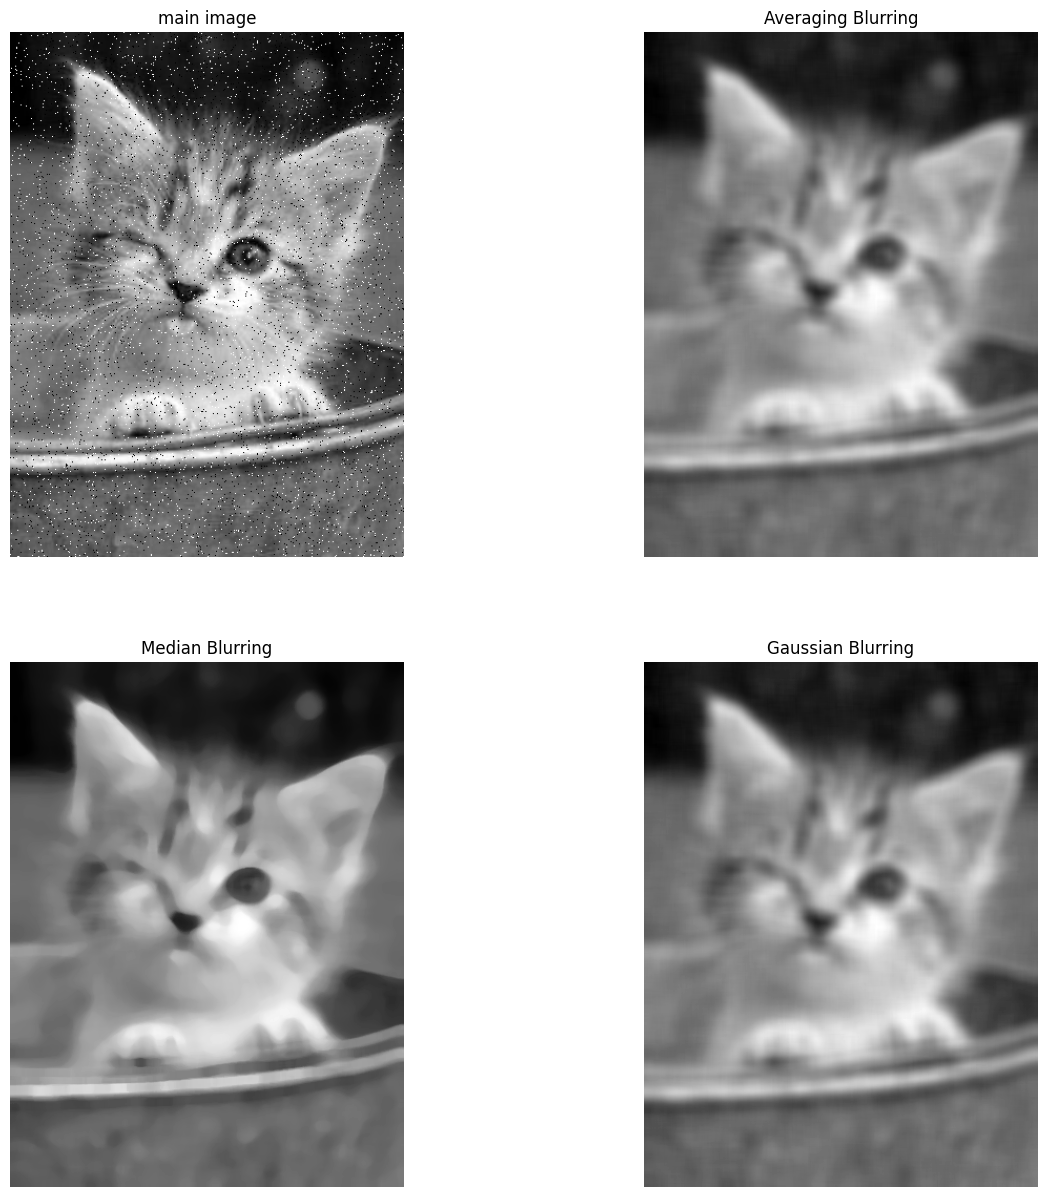

In [269]:
# Do not change this cell
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image,cmap='gray')
plt.title("main image")
plt.axis("off")

AB = Averaging_Blurring(image,15)
plt.subplot(2,2,2)
plt.imshow(AB,cmap='gray')
plt.title("Averaging Blurring")
plt.axis("off")

MB = Median_Blurring(image,15)
plt.subplot(2,2,3)
plt.imshow(MB,cmap='gray')
plt.title("Median Blurring")
plt.axis("off")

GB = Gaussian_Blurring(image,15,40)
plt.subplot(2,2,4)
plt.imshow(GB,cmap='gray')
plt.title("Gaussian Blurring")
plt.axis("off")

## part c

<h3> in this section we want to implement all blurrings with opencv and compare their with part b </h3>
<h3><b> note : for comparison, the parameters should be the same as in part b </b></h3>

In [270]:
AveragingBlurring = cv2.blur(img, (15, 15))
MedianBlurring = cv2.medianBlur(img, 15)
GaussianBlurring = cv2.GaussianBlur(img, (15, 15), 40)

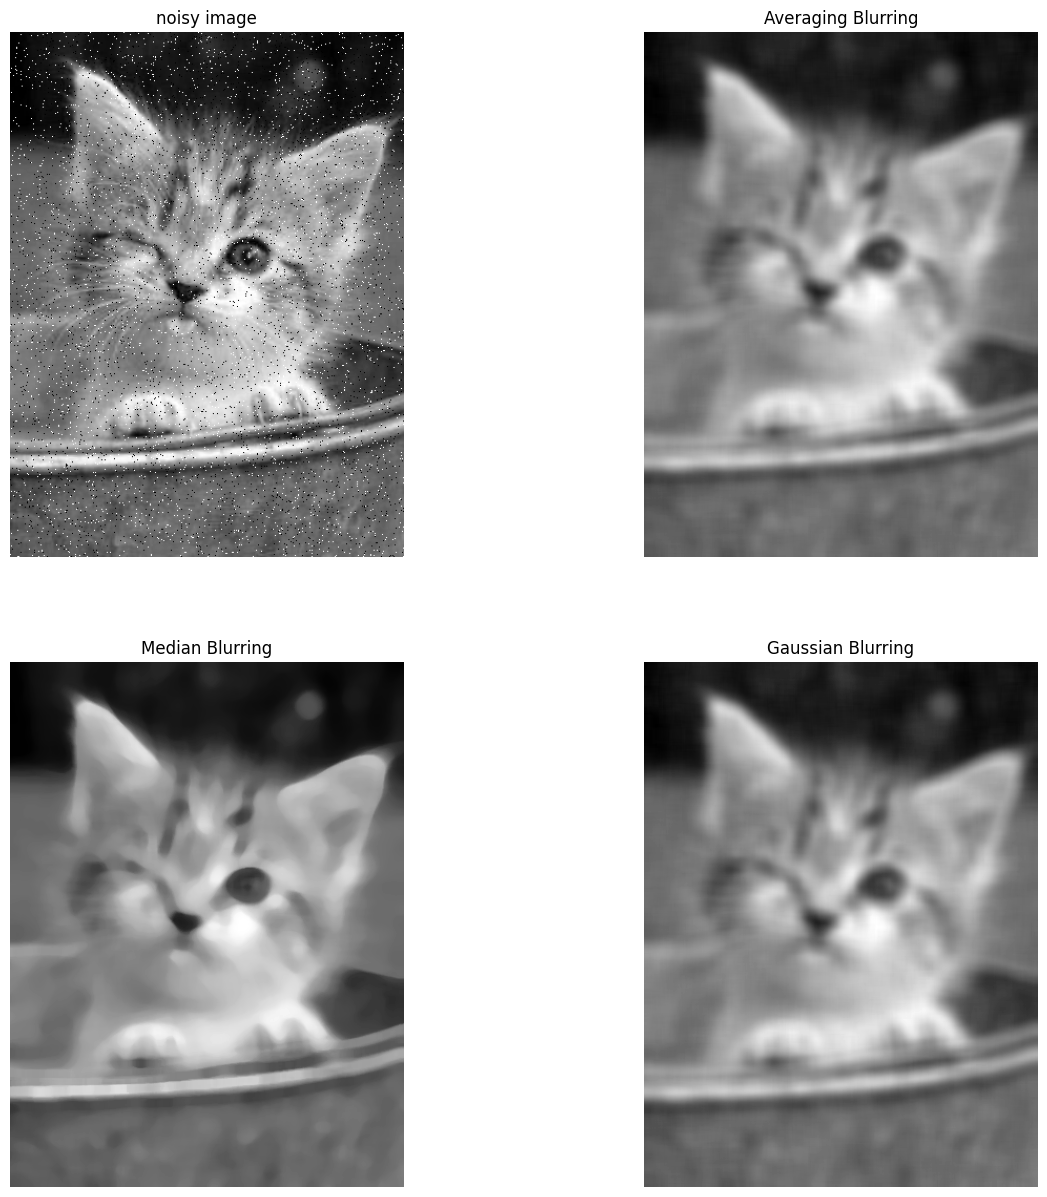

In [271]:
# Do not change this cell
Array = [image, AveragingBlurring, MedianBlurring, GaussianBlurring]
titles = ['noisy image', 'Averaging Blurring', 'Median Blurring', 'Gaussian Blurring']
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(Array[i],cmap='gray')
  plt.title(titles[i])
  plt.axis("off")